# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [12]:
import numpy as np
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (D - A) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [13]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)

invD = np.diag(1./diag_1d)
BB = invD @ B
c = invD @ b

In [14]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [15]:
np.linalg.norm(BB)

0.36436161983015336

### Do the Jacobi iteration

In [16]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
    x = BB @ x + c

In [17]:
# Check the result:

A @ x - b

array([ 1.11022302e-16,  0.00000000e+00, -2.22044605e-16, -1.11022302e-16,
        1.11022302e-16,  0.00000000e+00, -2.08166817e-17,  0.00000000e+00,
       -2.77555756e-17,  1.11022302e-16])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


In [1]:
def jacobi_iteration(A, b, niter):
    
    diag_1d = np.diag(A)

    B = -A.copy()
    np.fill_diagonal(B, 0)

    D = np.diag(diag_1d)

    invD = np.diag(1./diag_1d)
    B = invD @ B
    c = invD @ b
    
    m = A.shape[0]
    
    x0 = np.ones(m)
    
    errors = np.zeros(n_iter)
    
    for _ in range(n_iter):
        x = B @ x0 + c
        delta_x = np.linalg.norm(x - x0)
        errors[i] = delta_x
        
        x0 = x
        
    return x, B, np.array(errors)

In [34]:
n = 10
A = rndm.uniform(size=(n, n))
b = rndm.uniform(size=n)

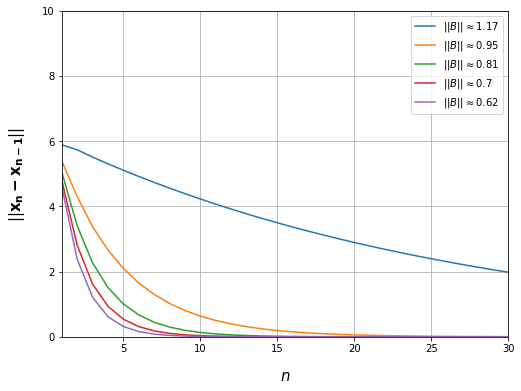

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

n_iter = 50

for j in range(5):
    A_j = A + np.diagflat([j + 3.9]*n)

    x, B, errors = jacobi_iteration(A_j, b, n_iter)

    iterations = np.arange(1, n_iter + 1)
    
    plt.plot(iterations, errors, label=r'$||B|| \approx %s$' % round(np.linalg.norm(B), 2))

#plt.title(r'$||x_n - x_{n-1}||$ v.s. $n$')
plt.ylabel(r'$||\mathbf{x_n - x_{n-1}}||$', size=15, labelpad=15)
plt.xlabel(r'$n$', size=15, labelpad=15)
plt.ylim(0, 10)
plt.xlim(1, 30)
plt.legend()
plt.grid()
plt.show()